<a href="https://colab.research.google.com/github/Sudheer4pro/pattern-recognition-model/blob/main/mnist_pattern_detection_model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving img33.png to img33 (2).png
Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 117s 120ms/step - accuracy: 0.8148 - loss: 0.6026 - val_accuracy: 0.9830 - val_loss: 0.0518 - learning_rate: 0.0010
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 112s 119ms/step - accuracy: 0.9642 - loss: 0.1168 - val_accuracy: 0.9892 - val_loss: 0.0323 - learning_rate: 0.0010
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 118ms/step - accuracy: 0.9731 - loss: 0.0893 - val_accuracy: 0.9810 - val_loss: 0.0584 - learning_rate: 0.0010
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9771 - loss: 0.0740 - val_accuracy: 0.9799 - val_loss: 0.0652 - learning_rate: 0.0010
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 117ms/step - accuracy: 0.9797 - loss: 0.0677 - val_accuracy: 0.9908 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 112s 119ms/step - accuracy: 0.9826 - loss: 0.0599 - val_accuracy: 0.9903 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 7/20
938/938 ━━━━━━━━━━━

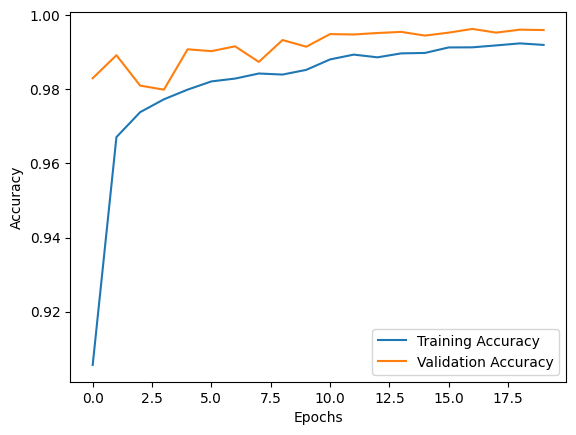

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predicted Digit: 3 with confidence 1.00


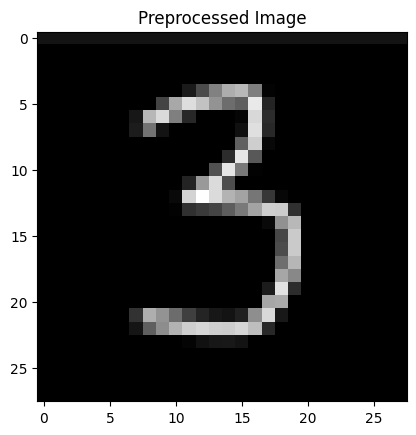

The predicted digit is: 3


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import files

# Upload the image
uploaded = files.upload()

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(data_gen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('mnist_pattern_detection_model.keras')

# Function to preprocess and predict from an uploaded image
def predict_from_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img = Image.fromarray(255 - np.array(img))  # Invert image colors
    img_array = np.array(img).astype('float32') / 255  # Normalize
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Load the trained model
    model = tf.keras.models.load_model('mnist_pattern_detection_model.keras')

    # Predict the digit
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)
    print(f"Predicted Digit: {predicted_digit} with confidence {confidence:.2f}")

    # Visualize the preprocessed image
    plt.imshow(img_array[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.show()

    return predicted_digit

# Example usage: Test with the uploaded image
predicted_digit = predict_from_image('img33.png')
print(f"The predicted digit is: {predicted_digit}")
